Import Library sesuai dengan yang dibutuhkan berdasarkan data

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import os
import sys
import io
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler



---


Import dataset dari file 'used_cars.csv'




biasa setiap sambungan terputus maka harus diupload lagi secara manual datasetnya.

In [0]:
from google.colab import files
uploaded = files.upload()



---


Membaca file dataset 'used_cars.csv'

In [0]:
dataset = pd.read_csv('used_cars.csv')



---


Mengambil fitur/kolom yang diperlukan dari dataset tersebut yang akan dipakai selanjutnya

In [0]:
dataset = dataset[['odometer','cylinders','transmission','paint_color','size','condition','fuel','year','model','price','lat']]
dataset.head()

,odometer,cylinders,transmission,paint_color,size,condition,fuel,year,model,price,lat
0,63500.0,4 cylinders,manual,black,compact,excellent,gas,2012.0,golf r,17899,40.7372
1,10.0,NaN,automatic,NaN,NaN,excellent,gas,2016.0,f-150,0,40.5881
2,7554.0,NaN,automatic,white,NaN,excellent,gas,2015.0,sierra 1500,46463,40.5881
3,10.0,NaN,automatic,NaN,NaN,excellent,gas,2016.0,f-150,0,40.5881
4,70150.0,NaN,automatic,white,NaN,NaN,diesel,2018.0,f-450,49999,40.3744


In [0]:
dataset = dataset.dropna()
dataset

,odometer,cylinders,transmission,paint_color,size,condition,fuel,year,model,price,lat
0,63500.0,4 cylinders,manual,black,compact,excellent,gas,2012.0,golf r,17899,40.7372
24,110982.0,4 cylinders,automatic,grey,mid-size,good,gas,2008.0,civic,4600,40.7499
48,67348.0,10 cylinders,automatic,white,full-size,good,gas,2004.0,f550 mechanics service,28000,40.3179
57,129000.0,6 cylinders,manual,blue,full-size,good,gas,2004.0,mustang,2500,41.2627
109,65000.0,4 cylinders,automatic,white,full-size,like new,gas,2015.0,jetta,12000,37.1790
...,...,...,...,...,...,...,...,...,...,...,...
19920,184000.0,6 cylinders,automatic,grey,full-size,excellent,gas,2006.0,trailblazer lt,3900,46.2109
19927,35050.0,4 cylinders,automatic,blue,mid-size,like new,gas,2017.0,impreza 2.0i sport,11995,46.2379
19944,4100.0,4 cylinders,automatic,green,full-size,excellent,gas,2019.0,cherokee latitude fwd,18995,46.2676
19952,196700.0,8 cylinders,automatic,white,full-size,excellent,diesel,2004.0,silverado 2500 hd duramax,12000,46.1871


In [0]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
odometer,4676.0,115833.095808,8.544976e+04,0.0000,72304.0000,114220.50000,151000.0000,2.500005e+06
year,4676.0,2008.298760,7.951802e+00,1917.0000,2005.0000,2009.00000,2013.0000,2.020000e+03
price,4676.0,37003.133661,1.805288e+06,0.0000,4498.7500,7500.00000,14491.7500,1.234568e+08
lat,4676.0,39.926599,3.731324e+00,12.6231,37.2724,38.16205,44.1945,5.303240e+01


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4676 entries, 0 to 19961
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   odometer      4676 non-null   float64
 1   cylinders     4676 non-null   object 
 2   transmission  4676 non-null   object 
 3   paint_color   4676 non-null   object 
 4   size          4676 non-null   object 
 5   condition     4676 non-null   object 
 6   fuel          4676 non-null   object 
 7   year          4676 non-null   float64
 8   model         4676 non-null   object 
 9   price         4676 non-null   int64  
 10  lat           4676 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 438.4+ KB


In [0]:
dataset.isna().sum()

odometer        0
cylinders       0
transmission    0
paint_color     0
size            0
condition       0
fuel            0
year            0
model           0
price           0
lat             0
dtype: int64

(array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006]),
 <a list of 7 Text major ticklabel objects>)

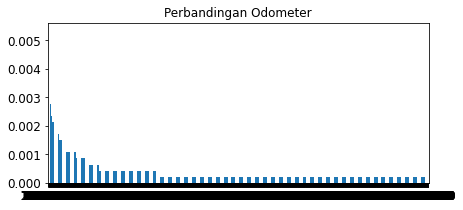

In [0]:
plt.subplots(figsize=(15,10))
plt.subplot(321)
dataset.odometer.value_counts(100).plot(kind='bar', title="Perbandingan Odometer", fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

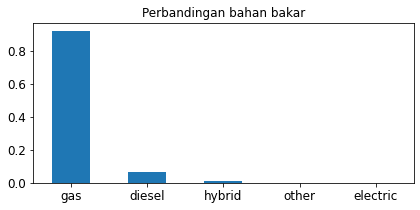

In [0]:
plt.subplots(figsize=(15,10))
plt.subplot(323)
dataset.fuel.value_counts(100).plot(kind='bar', title='Perbandingan bahan bakar', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

(array([0.  , 0.02, 0.04, 0.06, 0.08]),
 <a list of 5 Text major ticklabel objects>)

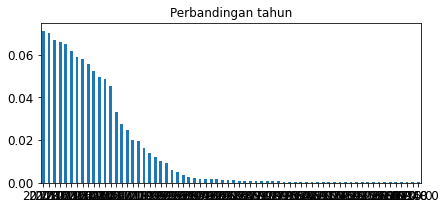

In [0]:
plt.subplots(figsize=(15,10))
plt.subplot(323)
dataset.year.value_counts(100).plot(kind='bar', title='Perbandingan tahun', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25]),
 <a list of 6 Text major ticklabel objects>)

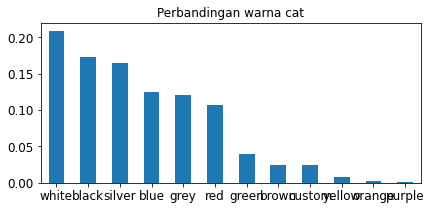

In [0]:
plt.subplots(figsize=(15,10))
plt.subplot(323)
dataset.paint_color.value_counts(100).plot(kind='bar', title='Perbandingan warna cat', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

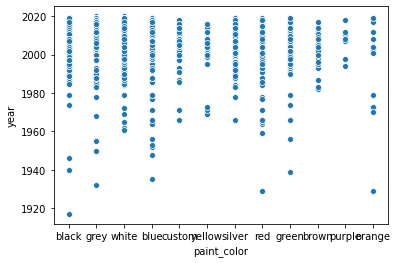

In [0]:
sns.scatterplot(x='paint_color', y='year', data=dataset)

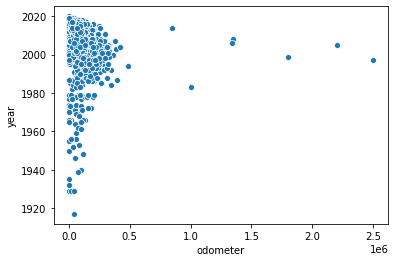

In [0]:
sns.scatterplot(x='odometer', y='year', data=dataset)

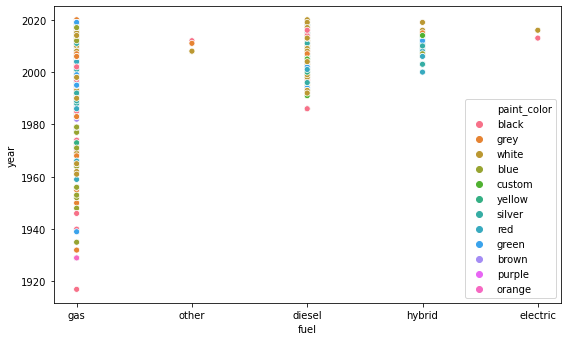

In [0]:
plt.subplots(figsize=(20,12))
plt.subplot(221)
sns.scatterplot(x=dataset.fuel, y=dataset.year, hue=dataset.paint_color)

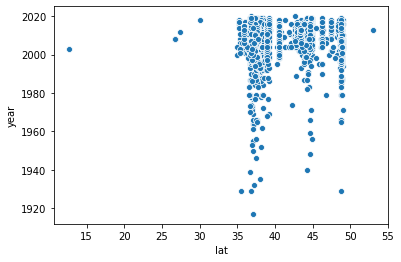

In [0]:
sns.scatterplot(x='lat', y='year', data=dataset)

Pembuatan centroid dengan K = 3

In [0]:
centro = [
    [0, 0, '0'],
    [0, 0, '1'],
    [0, 0, '2'],
]
# buat menjadi dataframe
centroid = pd.DataFrame(centro, columns=['odometer', 'year', 'cluster'])

odometer = []
year = []
x0 = np.random.randint(min(dataset['odometer']),max(dataset['odometer']))
y0 = np.random.randint(min(dataset['year']),max(dataset['year']))
x1 = np.random.randint(min(dataset['odometer']),max(dataset['odometer']))
y1 = np.random.randint(min(dataset['year']),max(dataset['year']))
x2 = np.random.randint(min(dataset['odometer']),max(dataset['odometer']))
y2 = np.random.randint(min(dataset['year']),max(dataset['year']))

odometer.append(x0)
odometer.append(x1)
odometer.append(x2)
year.append(y0)
year.append(y1)
year.append(y2)

centroid['odometer'] =odometer
centroid['year'] = year
centroid

,odometer,year,cluster
0,460256,1944,0
1,439120,1965,1
2,1856355,2011,2


Penentuan centroid di awal akan mempengaruhi hasil akhir dari clustering

Mengimplementasikan centroid sesuai pada titiknya

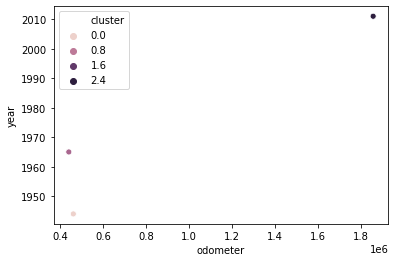

In [0]:
sns.scatterplot(x='odometer', y='year', hue='cluster', data=dataset.append(centroid))

Jika terdapat cluster yang beda, sebagai contoh cluster -1 berarti belum masuk diantara cluster yang ada

Pembuatan data untuk pergantian centroid

In [0]:
update = [
    [0, 0, '0'],
    [0, 0, '1'],
    [0, 0, '2'],
]

# buat menjadi dataframe
NewCentroid = pd.DataFrame(update, columns=['odometer', 'year', 'cluster'])
NewCentroid

,odometer,year,cluster
0,0,0,0
1,0,0,1
2,0,0,2


Proses clustering dan perubahan titik centroid dilakukan hingga posisi titik centroid sudah tidak berpindah lagi

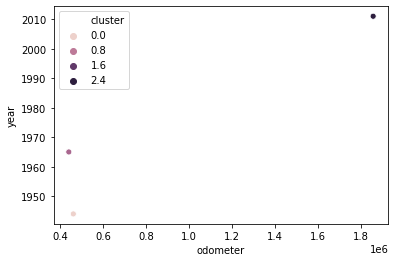

In [0]:
sns.scatterplot(x='odometer', y='year', hue='cluster', data=dataset.append(centroid))

In [0]:
beda = True
j = 1
while (beda is True): #akan melakukan looping selama "beda " bernilai True (titik centroid sudah tidak berubah)
    clusterr = []
    baru  = []

    x02, y02 = centroid.iloc[0][['odometer', 'year']] #mengambil titik Centroid ke 0
    x12, y12 = centroid.iloc[1][['odometer', 'year']] #mengambil titik Centroid ke 1
    x22, y22 = centroid.iloc[2][['odometer', 'year']] #mengambil titik Centroid ke 2

    #mencari centroid terdekat dengan setiap titik
    for i in range(len(dataset)):
        x1, y1 = dataset.iloc[i][['odometer', 'year']] #mengambil titik untuk setiap data pada dataset

        # euclidean distant
        dist0 = ((x02-x1)**2 + (y02-y1)**2)**0.5 
        dist1 = ((x12-x1)**2 + (y12-y1)**2)**0.5
        dist2 = ((x22-x1)**2 + (y22-y1)**2)**0.5

        if (dist0 < dist1) and (dist0 < dist2): #jika nilai dist0 paling kecil, cluster = 0
            hasil = '0'
        elif  (dist1 < dist0) and (dist1 < dist2): #jika nilai dist1 paling kecil, cluster = 1
            hasil = '1'
        elif  (dist2 < dist0) and (dist2 < dist1): #jika nilai dist2 paling kecil, cluster = 2
            hasil = '2'
        clusterr.append(hasil) #append hadil cluster tadi ke list clusterr

    dataset['cluster'] = clusterr #ganti kolom 'cluster' pada dataset dengan list clusterr tadi
    
    #Update centroid
    x0 = dataset[dataset['cluster'] == '0']['odometer'].tolist() #mengambil semua nilai pada kolom 'odometer' yang cluster nya 0
    y0 = dataset[dataset['cluster'] == '0']['year'].tolist() #mengambil semua nilai pada kolom 'year' yang cluster nya 0
    
    #menghitung mean untuk nilai baru dari centroid 0
    if ((x0)and(y0) != 0) :
      mean_x0 = sum(x0) / len(x0)
      mean_y0 = sum(y0) / len(y0)
    else :
      mean_x0 = 0
      mean_y0 = 0
    

    x1 = dataset[dataset['cluster'] == '1']['odometer'].tolist() #mengambil semua nilai pada kolom 'odometer' yang cluster nya 1
    y1 = dataset[dataset['cluster'] == '1']['year'].tolist() #mengambil semua nilai pada kolom 'year' yang cluster nya 1
    
    #menghitung mean untuk nilai baru dari centroid 1
    if ((x1)and(y1) != 0) :
      mean_x1 = sum(x1) / len(x1)
      mean_y1 = sum(y1) / len(y1)
    else :
      mean_x1 = 0
      mean_y1 = 0

    x2 = dataset[dataset['cluster'] == '2']['odometer'].tolist() #mengambil semua nilai pada kolom 'odometer' yang cluster nya 2
    y2 = dataset[dataset['cluster'] == '2']['year'].tolist() #mengambil semua nilai pada kolom 'year' yang cluster nya 2
    
    #menghitung mean untuk nilai baru dari centroid 2
    if ((x2)and(y2) != 0) :
      mean_x2 = sum(x2) / len(x2)
      mean_y2 = sum(y2) / len(y2)
    else :
      mean_x2 = 0
      mean_y2 = 0

    #mengganti nilai centroid baru dengan mean yang sudah dihitung 
    NewCentroid.iloc[0,0] = mean_x0
    NewCentroid.iloc[0,1] = mean_y0
    NewCentroid.iloc[1,0] = mean_x1
    NewCentroid.iloc[1,1] = mean_y1
    NewCentroid.iloc[2,0] = mean_x2
    NewCentroid.iloc[2,1] = mean_y2

    if (NewCentroid.iloc[0,:2].all() != centroid.iloc[0,:2].all()): #jika kolom odometer dan year pada centroid baru dan centroid beda (centroid berpindah)
        #mengganti nilai centroid dengan centroid baru dan mengganti nilai centroid baru (disini saya hanya menukar nilai centroid dan centroid baru)
        centroid,NewCentroid = NewCentroid, centroid 
    else: #jika centroid dan centroid baru sama (centroid tidak berpindah)
        notSame = False #notSame berubah jadi False agar loop berhenti

In [0]:
NewCentroid 

,odometer,year,cluster
0,7.761637e+05,1997.000000,0
1,1.135641e+05,2008.311697,1
2,1.837991e+06,2003.000000,2


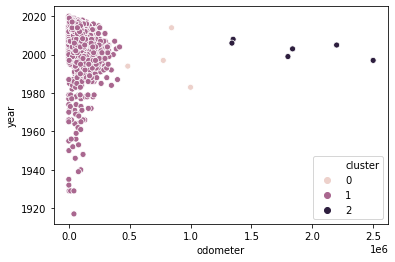

In [0]:
sns.scatterplot(x='odometer', y='year', hue='cluster', data=dataset.append(centroid))